In [63]:
import pandas as pd

Identify your problem statement, find all your datasets, identify the questions you want to answer, reach out to polling/consulting firms to work with. 

Potential question--Why did these counties flip to Trump? 

Explore your data to understand it--drop data that is not relevant

 Look to predict something (next presidential election outcome).
 
Think about what would happen if more people became UNINSURED and the result that could have. 

Should slcie by margin of county flip. First-fourth quartiles

Look at population counts per county. 

Margin of victory/voting which way (Trump/Clinton) is more important to predict than simply whcih flipped (make that a subset)

A listing of the specific counties that flipped: 
http://www.npr.org/2016/11/15/502032052/lots-of-people-voted-for-obama-and-trump-heres-where-in-3-charts

Nate Silver postulates that education level is a key predctor. http://fivethirtyeight.com/features/education-not-income-predicted-who-would-vote-for-trump/?ex_cid=story-twitter 

Daily Kos article: http://www.dailykos.com/story/2017/1/30/1627319/-Daily-Kos-Elections-presents-the-2016-presidential-election-results-by-congressional-district

Diversity Index scource: https://www.kaggle.com/mikejohnsonjr/us-counties-diversity-index

In [64]:
election = pd.read_csv('2016_election.csv')

In [65]:
prev_election = pd.read_csv('2012_election.csv')

In [66]:
ui_change = pd.read_csv('County_Data_2016.csv')

In [67]:
div = pd.read_csv('diversityindex.csv')

In [68]:
edu = pd.read_excel('education_25_older_filt.xls')

Change in education the past 10 years--find the difference between them for each county

In [69]:
pop = pd.read_excel('us county populations.xls')

In [70]:
len(edu)

3283

In [71]:
len(pop)

3145

In [72]:
pop.dtypes

state              object
county             object
est_pop_2015        int64
pop_change_2015     int64
int_mig_2015        int64
dom_mig_2015        int64
mig_2015            int64
dtype: object

In [73]:
div.head()

Location  Diversity-Index  \
0  Aleutians West Census Area, AK         0.769346   
1               Queens County, NY         0.742224   
2                 Maui County, HI         0.740757   
3              Alameda County, CA         0.740399   
4      Aleutians East Borough, AK         0.738867   

   Black or African American alone, percent, 2013  \
0                                             7.4   
1                                            20.9   
2                                             0.8   
3                                            12.4   
4                                             7.7   

   American Indian and Alaska Native alone, percent, 2013  \
0                                               13.8        
1                                                1.3        
2                                                0.6        
3                                                1.2        
4                                               21.8        

   Asian alone, percent, 2013  \
0                        31.1   
1                        25.2   
2                        28.8   
3                        28.2   
4                        41.4   

   Native Hawaiian and Other Pacific Islander alone, percent,  \
0                                                2.3            
1                                                0.2            
2                                               10.6            
3                                                1.0            
4                                                0.7            

   Two or More Races, percent, 2013  Hispanic or Latino, percent, 2013  \
0                               4.8                               14.6   
1                               2.7                               28.0   
2                              23.3                               10.7   
3                               5.2                               22.7   
4                               3.7                               13.5   

   White alone, not Hispanic or Latino, percent, 2013  
0                                               29.2   
1                                               26.7   
2                                               31.5   
3                                               33.2   
4                                               12.9

In [74]:
div = div.rename(columns={'Location':'county_state','Diversity-Index':'div_index','Black or African American alone, percent, 2013':'af_am','American Indian and Alaska Native alone, percent, 2013':'native_2013','Asian alone, percent, 2013':'asian_am','Native Hawaiian and Other Pacific Islander alone, percent,':'pac_am','Two or More Races, percent, 2013':'two_or_more_races','Hispanic or Latino, percent, 2013':'hisp_lat_am','White alone, not Hispanic or Latino, percent, 2013':'white_am'})

In [75]:
len(div)

3195

In [76]:
election.county_name.count()

3141

In [77]:
#Need to drop Alaska as it doesn't have any county names
election = election[election.county_name!='Alaska']
pop = pop[pop.county!='Alaska']

In [78]:
election = election.drop(election[[0,10]], axis=1)

In [79]:
election['county_state'] = election['county_name'] + ', ' + election['state_abbr']

In [80]:
prev_election['county_state'] = prev_election['county_name'] + ', ' + prev_election['state_abbr']

In [81]:
ui_change['county_state'] = ui_change['county_name'] + ', ' + ui_change['state_abbrev']

In [82]:
pop.head()

state          county  est_pop_2015  pop_change_2015  int_mig_2015  \
0    AL         Alabama       4858979            12568          5726   
1    AL  Autauga County         55347               57            19   
2    AL  Baldwin County        203709             3996           221   
3    AL  Barbour County         26489             -326             0   
4    AL     Bibb County         22583               34            21   

   dom_mig_2015  mig_2015  
0         -2268      3458  
1          -140      -121  
2          3469      3690  
3          -281      -281  
4             4        25

In [83]:
pop['county_state'] = pop['county'] + ', ' + pop['state']

In [84]:
edu['county_state'] = edu['Area name'] + ', ' + edu['State']

In [85]:
edu.isnull().sum()

FIPS Code                                0
State                                    0
Area name                                0
less_hs_diploma_2000                    11
hs_diploma_only_2000                    11
less_4_years_2000                       11
four_or_ higher_2000                    11
per_less_high_school diploma_2000       11
per_hs_diploma_only_2000                11
per_less_4_years_2000                   11
per_four_or_ higher_2000                11
less_high_school_diploma_2011_15        10
hs_diploma_only_2011_15                 10
less_4_years_2011_15                    10
four_or_ higher_2011_15                 10
per_less_high_school_diploma_2011_15    10
per_hs_diploma_only_2011_15             10
per_less_4_years_2011_15                10
per_four_or_higher_2011_15              10
county_state                             0
dtype: int64

In [86]:
edu = edu.dropna()

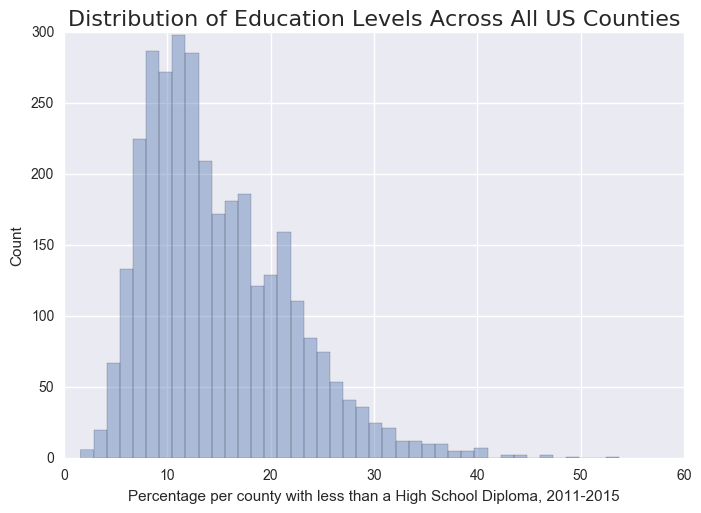

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.distplot(edu.per_less_high_school_diploma_2011_15, kde=False)
ax.set(xlabel='Percentage per county with less than a High School Diploma, 2011-2015', ylabel='Count')
ax.set_title('Distribution of Education Levels Across All US Counties', fontsize=16, fontname='Ubuntu')
plt.show()

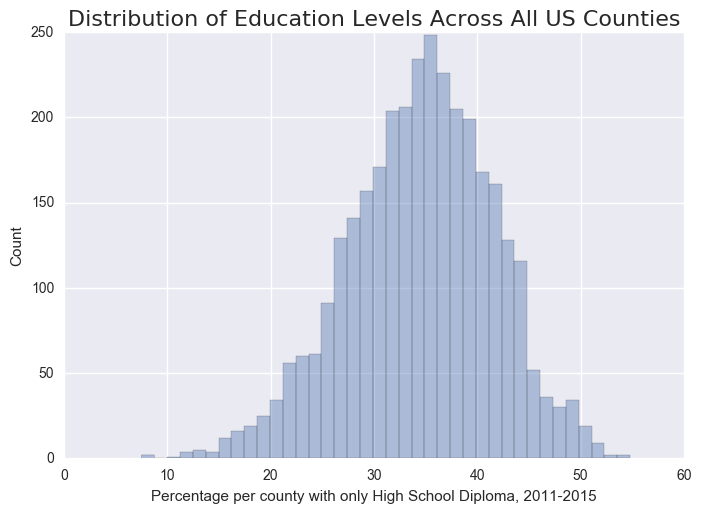

In [88]:
ax = sns.distplot(edu.per_hs_diploma_only_2011_15, kde=False)
ax.set(xlabel='Percentage per county with only High School Diploma, 2011-2015', ylabel='Count')
ax.set_title('Distribution of Education Levels Across All US Counties', fontsize=16, fontname='Ubuntu')
plt.show()

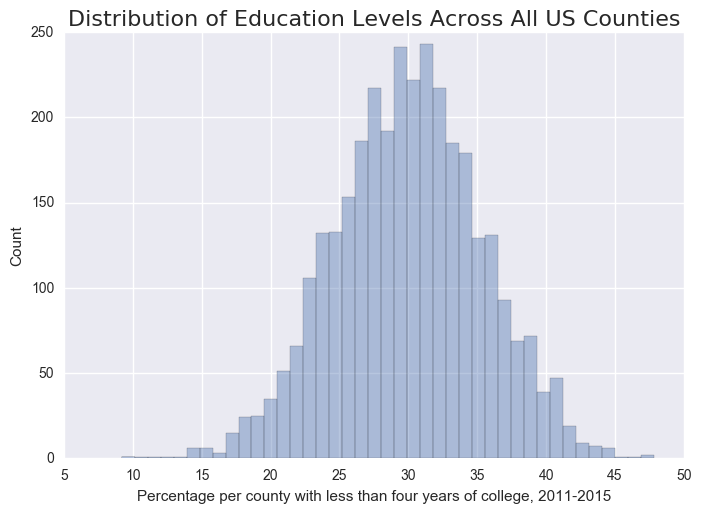

In [89]:
ax = sns.distplot(edu.per_less_4_years_2011_15, kde=False)
ax.set(xlabel='Percentage per county with less than four years of college, 2011-2015', ylabel='Count')
ax.set_title('Distribution of Education Levels Across All US Counties', fontsize=16, fontname='Ubuntu')
plt.show()

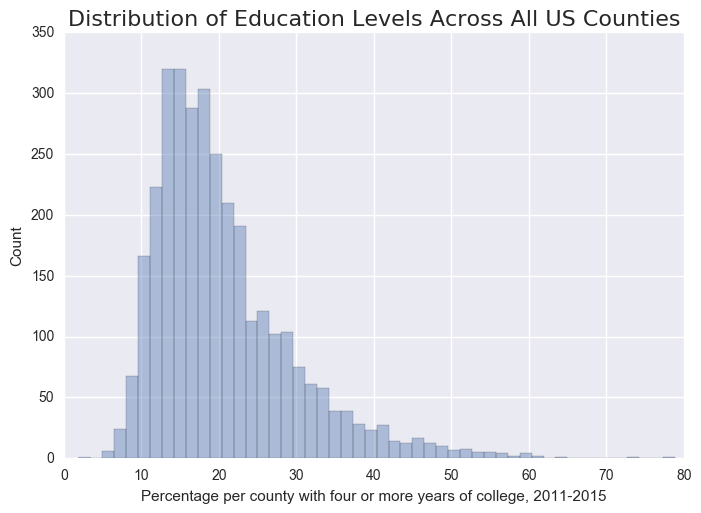

In [90]:
ax = sns.distplot(edu.per_four_or_higher_2011_15, kde=False)
ax.set(xlabel='Percentage per county with four or more years of college, 2011-2015', ylabel='Count')
ax.set_title('Distribution of Education Levels Across All US Counties', fontsize=16, fontname='Ubuntu')
plt.show()

In [91]:
election['per_dem'] = election['per_dem'].apply(lambda x: x*100)
election['per_gop'] = election['per_gop'].apply(lambda x: x*100)

In [92]:
prev_election['per_dem_2012'] = prev_election['per_dem_2012'].apply(lambda x: x*100)
prev_election['per_gop_2012'] = prev_election['per_gop_2012'].apply(lambda x: x*100)

In [93]:
election['per_point_diff'] = election['per_point_diff'].apply(lambda x: float(x.strip('%')))

In [94]:
# Making a new column for positive and negative--if per_dem is below 50%, negative. If
# above 50%, positive. 

In [95]:
election['election_range'] = election['per_dem'] - election['per_gop']

In [96]:
prev_election['election_range'] = prev_election['per_dem_2012'] - prev_election['per_gop_2012']

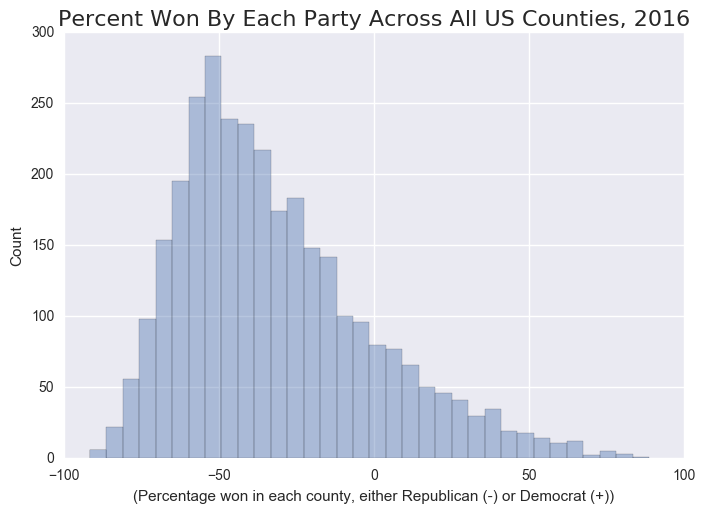

In [97]:
ax = sns.distplot(election.election_range, kde=False)
ax.set(xlabel = "(Percentage won in each county, either Republican (-) or Democrat (+))", ylabel='Count')
ax.set_title('Percent Won By Each Party Across All US Counties, 2016', fontsize=16, fontname='Ubuntu')
plt.show()


Democrats are in big trouble. Of course, this distribution doesn't mean that they're necessarily losing counties, but of those they held onto in 2016, they have a far, far weaker grasp on them than Republicans do on their side. Also, many of the Republican counties are in Red States with few electoral votes. However, for Congressional voting this is still a dangerous sign. 

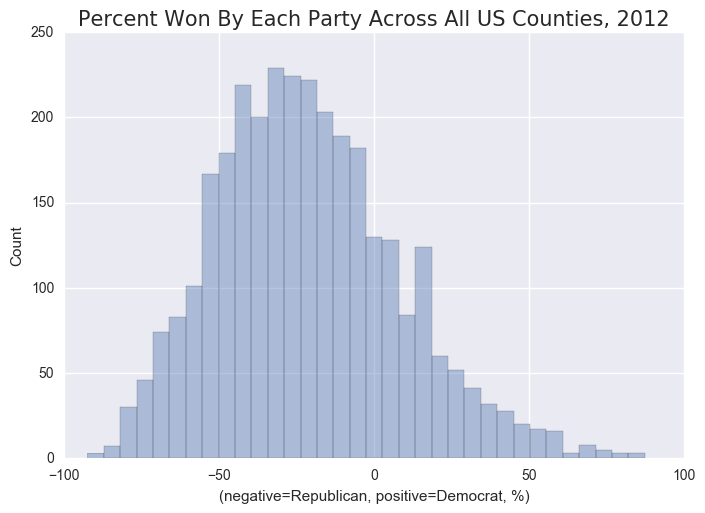

In [98]:
# What was it like in 2012? 
ax = sns.distplot(prev_election.election_range, kde=False)
ax.set(xlabel = "(negative=Republican, positive=Democrat, %)", ylabel='Count')
ax.set_title('Percent Won By Each Party Across All US Counties, 2012', fontsize=15, fontname='Ubuntu')
plt.show()
# It was already bad. But it's clearly gotten worse for Democrats. 

In [99]:
election['slight_dem'] = election['election_range'].apply(lambda x: 0< x <= 10)
election['slight_gop'] = election['election_range'].apply(lambda x: -10 <= x < 0)
election['med_dem'] = election['election_range'].apply(lambda x: 10< x <= 25)
election['med_gop'] = election['election_range'].apply(lambda x: -25 <= x < -10)
election['strong_dem'] = election['election_range'].apply(lambda x: 25 < x <= 50)
election['strong_gop'] = election['election_range'].apply(lambda x: -50 <= x < -25)

In [100]:
election.head()

votes_dem  votes_gop  total_votes    per_dem    per_gop    diff  \
29     5908.0    18110.0      24661.0  23.956855  73.435789  12,202   
30    18409.0    72780.0      94090.0  19.565310  77.351472  54,371   
31     4848.0     5431.0      10390.0  46.660250  52.271415     583   
32     1874.0     6733.0       8748.0  21.422039  76.966164   4,859   
33     2150.0    22808.0      25384.0   8.469902  89.851875  20,658   

    per_point_diff state_abbr     county_name        county_state  \
29           49.48         AL  Autauga County  Autauga County, AL   
30           57.79         AL  Baldwin County  Baldwin County, AL   
31            5.61         AL  Barbour County  Barbour County, AL   
32           55.54         AL     Bibb County     Bibb County, AL   
33           81.38         AL   Blount County   Blount County, AL   

    election_range slight_dem slight_gop med_dem med_gop strong_dem strong_gop  
29      -49.478934      False      False   False   False      False       True  
30      -57.786162      False      False   False   False      False      False  
31       -5.611165      False       True   False   False      False      False  
32      -55.544124      False      False   False   False      False      False  
33      -81.381973      False      False   False   False      False      False

In [101]:
ue_rates = pd.read_excel('Unemployment Rates.xlsx')
ue_rates = ue_rates.drop(ue_rates[[0,1,2,4,5]],axis=1)
ue_rates = ue_rates.rename(columns={'Unnamed: 3':'county_state','Unnamed: 6':'labor_force', 'Unnamed: 7':'employed','Unnamed: 8':'unemployed','Unnamed: 9':'ue_rate'})
ue_rates = ue_rates.drop(ue_rates.index[[0,1,2,3,4]])

In [102]:
ue_rates.labor_force = ue_rates.labor_force.astype(float)
ue_rates.employed =  ue_rates.employed.astype(float)
ue_rates.unemployed =  ue_rates.unemployed.astype(float)
ue_rates.ue_rate =  ue_rates.ue_rate.astype(float)

In [103]:
ue_rates.dtypes

county_state     object
labor_force     float64
employed        float64
unemployed      float64
ue_rate         float64
dtype: object

In [104]:
right = election.set_index('county_state')
left = ue_rates.set_index('county_state')
combined_1 = left.join(right, lsuffix='', rsuffix='_r')
combined_1 = combined_1.reset_index()

In [105]:
right = combined_1.set_index('county_state')
left = ui_change.set_index('county_state')
combined_2 = left.join(right, lsuffix='', rsuffix = '_r')
combined_2 = combined_2.reset_index()

In [106]:
right = combined_2.set_index('county_state')
left = div.set_index('county_state')
combined_3 = left.join(right, lsuffix='', rsuffix = '_r')
combined_3 = combined_3.reset_index()

In [107]:
right = combined_3.set_index('county_state')
left = edu.set_index('county_state')
combined_4 = left.join(right, lsuffix='', rsuffix = '_r')
combined_4 = combined_4.reset_index()

In [108]:
right = combined_4.set_index('county_state')
left = pop.set_index('county_state')
combined_5 = left.join(right, lsuffix='', rsuffix = '_r')
combined_5 = combined_5.reset_index()

In [109]:
combined_5.isnull().sum()

county_state                             0
state                                    0
county                                   0
est_pop_2015                             0
pop_change_2015                          0
int_mig_2015                             0
dom_mig_2015                             0
mig_2015                                 0
FIPS Code                                9
State                                    9
Area name                                9
less_hs_diploma_2000                     9
hs_diploma_only_2000                     9
less_4_years_2000                        9
four_or_ higher_2000                     9
per_less_high_school diploma_2000        9
per_hs_diploma_only_2000                 9
per_less_4_years_2000                    9
per_four_or_ higher_2000                 9
less_high_school_diploma_2011_15         9
hs_diploma_only_2011_15                  9
less_4_years_2011_15                     9
four_or_ higher_2011_15                  9
per_less_hi

In [110]:
combined_5.dropna(inplace=True)

In [111]:
combined_5 = combined_5[combined_5.county_name_r!='Alaska']
#Just making sure Alaska isn't included

In [112]:
combined_5.head()

county_state state            county  est_pop_2015  \
0  Abbeville County, SC    SC  Abbeville County         24932   
1     Acadia Parish, LA    LA     Acadia Parish         62577   
2   Accomack County, VA    VA   Accomack County         32973   
3        Ada County, ID    ID        Ada County        434211   
4      Adair County, IA    IA      Adair County          7228   

   pop_change_2015  int_mig_2015  dom_mig_2015  mig_2015  FIPS Code State  \
0                6            22           -12        10    45001.0    SC   
1               79            32          -281      -249    22001.0    LA   
2              -25            81           -53        28    51001.0    VA   
3             7364           933          3838      4771    16001.0    ID   
4             -189             0          -161      -161    19001.0    IA   

      ...     per_point_diff  state_abbr     county_name_r  election_range  \
0     ...              28.25          SC  Abbeville County      -28.254383   
1     ...              56.67          LA     Acadia Parish      -56.674943   
2     ...              11.71          VA   Accomack County      -11.710568   
3     ...               9.24          ID        Ada County       -9.239878   
4     ...              35.36          IA      Adair County      -35.355148   

   slight_dem  slight_gop  med_dem  med_gop  strong_dem  strong_gop  
0       False       False    False    False       False        True  
1       False       False    False    False       False       False  
2       False       False    False     True       False       False  
3       False        True    False    False       False       False  
4       False       False    False    False       False        True  

[5 rows x 61 columns]

In [113]:
election.describe()

votes_dem      votes_gop   total_votes      per_dem      per_gop  \
count  3.112000e+03    3112.000000  3.112000e+03  3112.000000  3112.000000   
mean   2.006065e+04   19622.378856  4.174537e+04    31.708228    63.613409   
std    7.199807e+04   40442.737492  1.134048e+05    15.358601    15.651728   
min    4.000000e+00      57.000000  6.400000e+01     3.144654     4.122067   
25%    1.166000e+03    3206.000000  4.820500e+03    20.475924    54.947846   
50%    3.153000e+03    7164.500000  1.094700e+04    28.473862    66.743096   
75%    9.608500e+03   17448.250000  2.879650e+04    39.999326    75.147062   
max    1.893770e+06  620285.000000  2.652072e+06    92.846592    95.272727   

       per_point_diff  election_range  
count     3112.000000     3112.000000  
mean        39.233014      -31.905181  
std         20.793041       30.883786  
min          0.040000      -91.636364  
25%         22.467500      -54.689887  
50%         40.315000      -38.217390  
75%         55.462500      -14.876874  
max         91.640000       88.724525

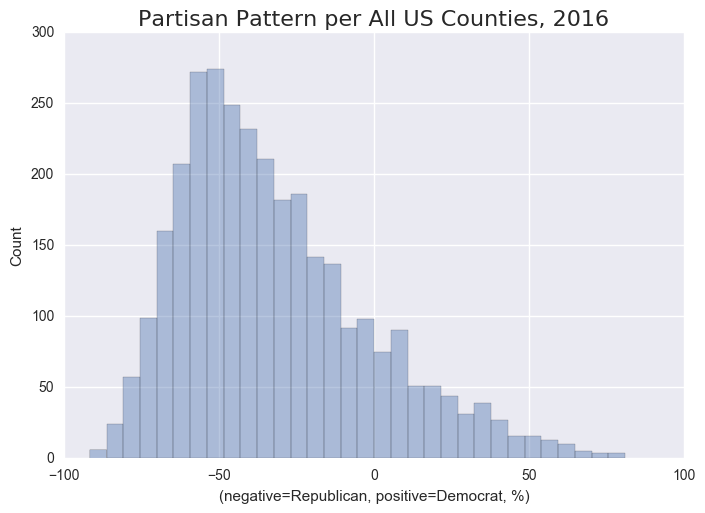

In [114]:
# Set up range variables
ax = sns.distplot(combined_5.election_range, kde=False)
ax.set(xlabel = "(negative=Republican, positive=Democrat, %)", ylabel='Count')
ax.set_title('Partisan Pattern per All US Counties, 2016', fontsize=16, fontname='Ubuntu')
plt.show()

In [115]:
len(combined_5)

3104

In [117]:
# All counties, not including those in Alaska.

In [118]:
virginia = combined_5[combined_5.state_abbr=='VA']
virginia.head()

county_state state            county  est_pop_2015  \
2    Accomack County, VA    VA   Accomack County         32973   
30  Albemarle County, VA    VA  Albemarle County        105703   
37   Alexandria city, VA    VA   Alexandria city        153511   
45  Alleghany County, VA    VA  Alleghany County         15677   
56     Amelia County, VA    VA     Amelia County         12903   

    pop_change_2015  int_mig_2015  dom_mig_2015  mig_2015  FIPS Code State  \
2               -25            81           -53        28    51001.0    VA   
30             1352           410           675      1085    51003.0    VA   
37             2071          2334         -2139       195    51510.0    VA   
45             -207             2           -85       -83    51005.0    VA   
56              118             8           123       131    51007.0    VA   

       ...     per_point_diff  state_abbr     county_name_r  election_range  \
2      ...              11.71          VA   Accomack County      -11.710568   
30     ...              25.06          VA  Albemarle County       25.056116   
37     ...              59.03          VA   Alexandria city       59.026135   
45     ...              37.07          VA  Alleghany County      -37.065426   
56     ...              36.30          VA     Amelia County      -36.304193   

    slight_dem  slight_gop  med_dem  med_gop  strong_dem  strong_gop  
2        False       False    False     True       False       False  
30       False       False    False    False        True       False  
37       False       False    False    False       False       False  
45       False       False    False    False       False        True  
56       False       False    False    False       False        True  

[5 rows x 61 columns]

In [119]:
# Making swing state list based on the crucial swing states this election.

IA = combined_5[combined_5['state_abbr']==('IA')]
WI = combined_5[combined_5['state_abbr']==('WI')]
MI = combined_5[combined_5['state_abbr']==('MI')]
PA = combined_5[combined_5['state_abbr']==('PA')]
FL = combined_5[combined_5['state_abbr']==('FL')]
NC = combined_5[combined_5['state_abbr']==('NC')]
OH = combined_5[combined_5['state_abbr']==('OH')]
MN = combined_5[combined_5['state_abbr']==('MN')]
swing_states= pd.concat([IA, WI, MI, PA, FL, NC, OH, MN])
# 'IA', 'WI','MI','PA','FL','NC','OH','MN'

In [120]:
swing_states.head()

county_state state            county  est_pop_2015  \
4        Adair County, IA    IA      Adair County          7228   
9        Adams County, IA    IA      Adams County          3796   
40   Allamakee County, IA    IA  Allamakee County         13886   
75   Appanoose County, IA    IA  Appanoose County         12529   
106    Audubon County, IA    IA    Audubon County          5773   

     pop_change_2015  int_mig_2015  dom_mig_2015  mig_2015  FIPS Code State  \
4               -189             0          -161      -161    19001.0    IA   
9                -75             0           -80       -80    19003.0    IA   
40              -175            21          -216      -195    19005.0    IA   
75               -99            -2           -61       -63    19007.0    IA   
106              -20             0           -19       -19    19009.0    IA   

        ...     per_point_diff  state_abbr     county_name_r  election_range  \
4       ...              35.36          IA      Adair County      -35.355148   
9       ...              39.77          IA      Adams County      -39.769452   
40      ...              24.32          IA  Allamakee County      -24.323534   
75      ...              36.38          IA  Appanoose County      -36.384514   
106     ...              31.25          IA    Audubon County      -31.251850   

     slight_dem  slight_gop  med_dem  med_gop  strong_dem  strong_gop  
4         False       False    False    False       False        True  
9         False       False    False    False       False        True  
40        False       False    False     True       False       False  
75        False       False    False    False       False        True  
106       False       False    False    False       False        True  

[5 rows x 61 columns]

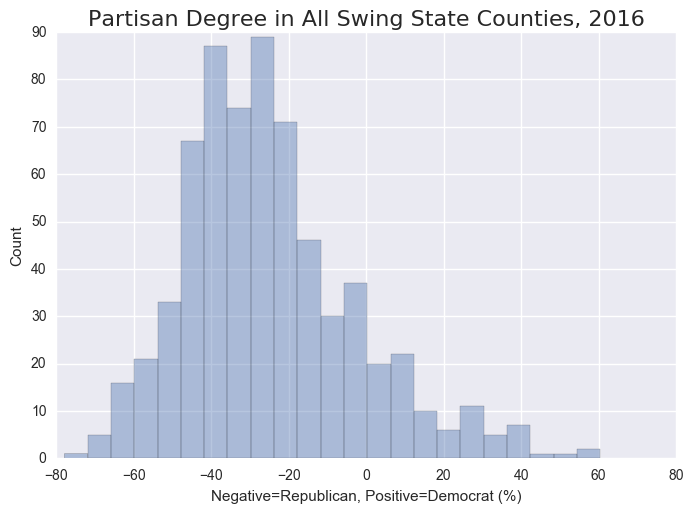

In [121]:
ax = sns.distplot(swing_states.election_range, kde=False)
ax.set(xlabel = "Negative=Republican, Positive=Democrat (%)", ylabel='Count')
ax.set_title('Partisan Degree in All Swing State Counties, 2016', fontsize=16, fontname='Ubuntu')
plt.show()
# As expected, in swing states it's not AS bad for Democrats compared to the rest of the 
# country but still quite dire. 

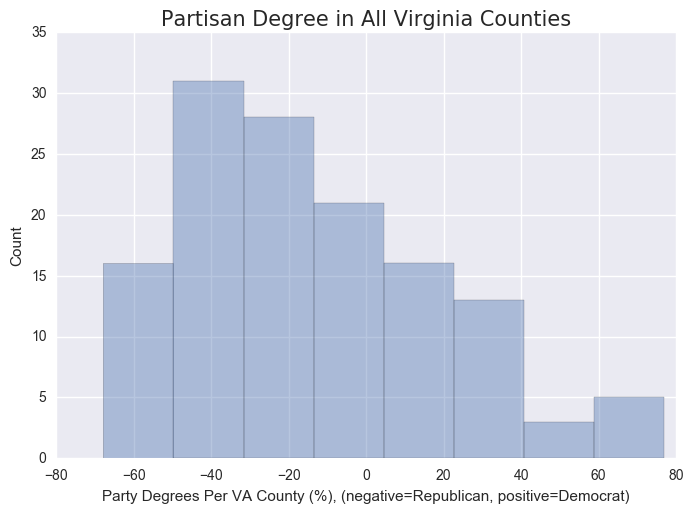

In [122]:
VA = combined_4[combined_4['state_abbr']==('VA')]
ax = sns.distplot(VA.election_range, kde=False)
ax.set(xlabel = "Party Degrees Per VA County (%), (negative=Republican, positive=Democrat)", ylabel='Count')
ax.set_title('Partisan Degree in All Virginia Counties', fontsize=15, fontname='Ubuntu')
plt.show()

# Influence of Ethnicity 

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

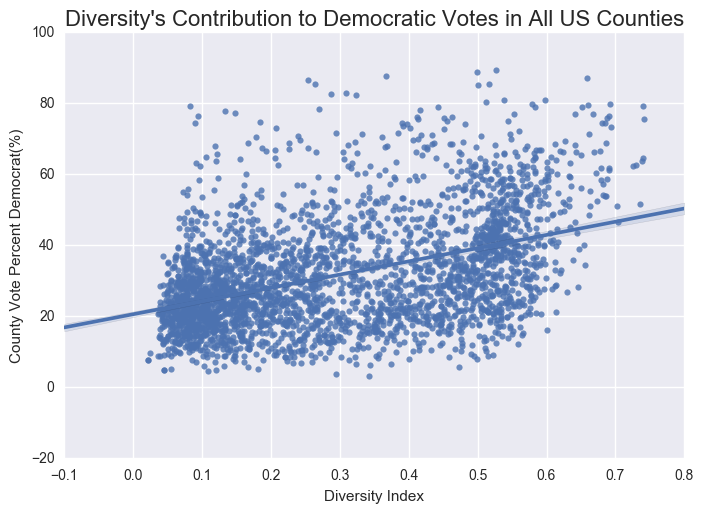

In [124]:
ax = sns.regplot(combined_5.div_index, combined_5.per_dem)
ax.set(xlabel = 'Diversity Index', ylabel = 'County Vote Percent Democrat(%)')
ax.set_title("Diversity's Contribution to Democratic Votes in All US Counties", fontsize=16)
plt.show()

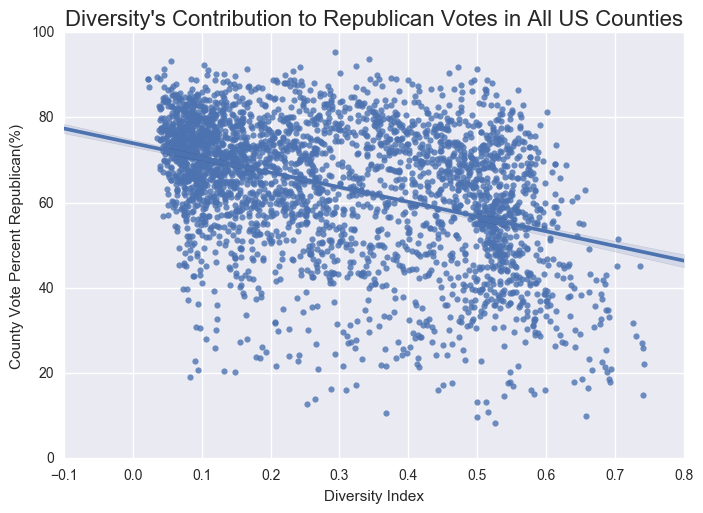

In [125]:
ax = sns.regplot(combined_5.div_index, combined_5.per_gop)
ax.set(xlabel = 'Diversity Index', ylabel = 'County Vote Percent Republican(%)')
ax.set_title("Diversity's Contribution to Republican Votes in All US Counties", fontsize=16)
plt.show()

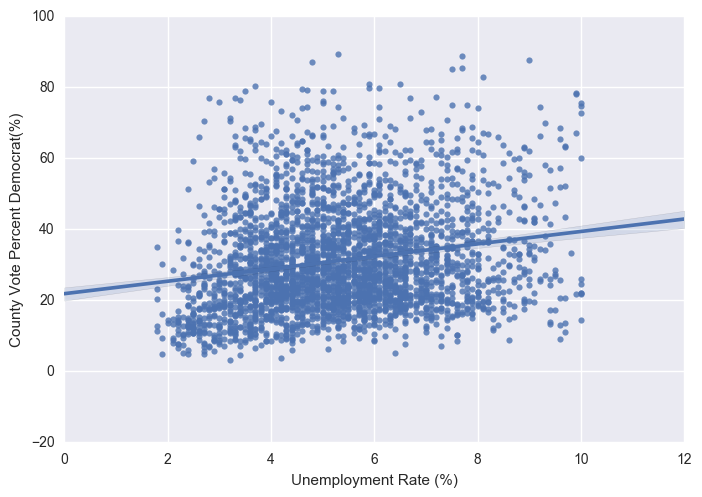

In [126]:
ue_rate_filt = combined_5[combined_5.ue_rate<=10]
ax = sns.regplot(ue_rate_filt.ue_rate, ue_rate_filt.per_dem)
ax.set(xlabel = 'Unemployment Rate (%)', ylabel = 'County Vote Percent Democrat(%)')
plt.show()
# Unemployment is not a good indicator of voting either way. 

In [127]:
# Unemployment rate not indicative one way or the other. 

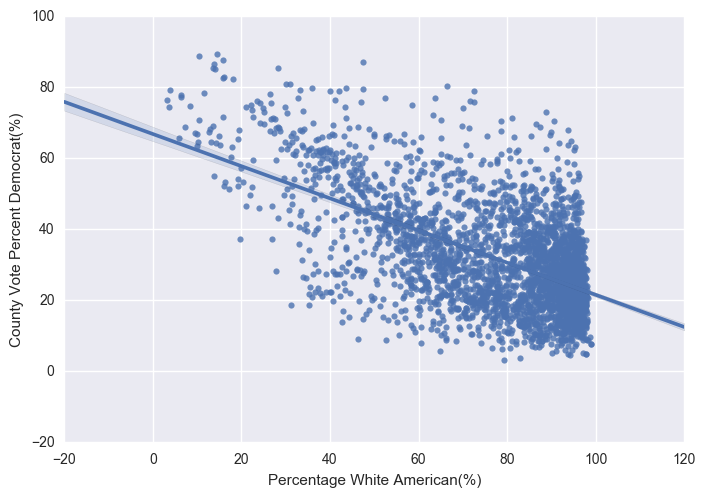

In [128]:
ax = sns.regplot(combined_5.white_am, combined_5.per_dem)
ax.set(xlabel = 'Percentage White American(%)', ylabel = 'County Vote Percent Democrat(%)')
plt.show()

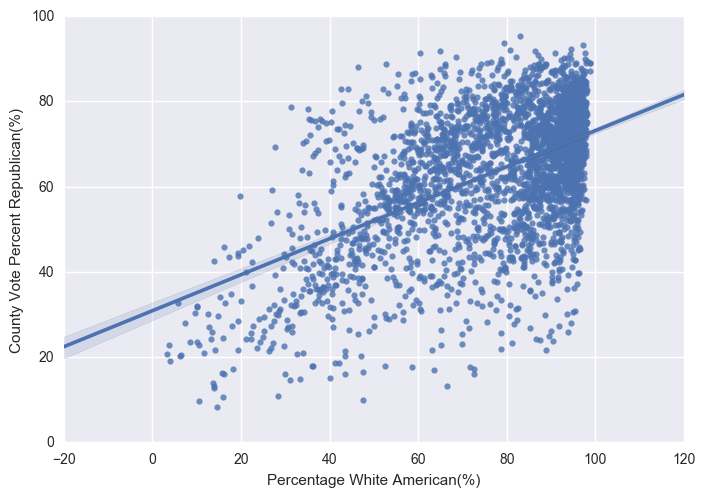

In [129]:
ax = sns.regplot(combined_5.white_am, combined_5.per_gop)
ax.set(xlabel = 'Percentage White American(%)', ylabel = 'County Vote Percent Republican(%)')
plt.show()
# It's scattered, but there is stil a strong correlation between percentage white 
# population and Republican vote. 

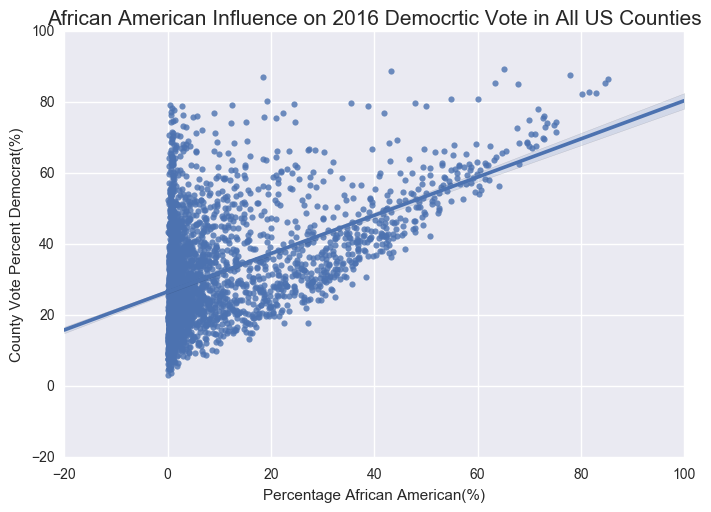

In [130]:
ax = sns.regplot(combined_5.af_am, combined_5.per_dem)
ax.set(xlabel = 'Percentage African American(%)', ylabel = 'County Vote Percent Democrat(%)')
ax.set_title('African American Influence on 2016 Democrtic Vote in All US Counties', fontsize=15)
plt.show()

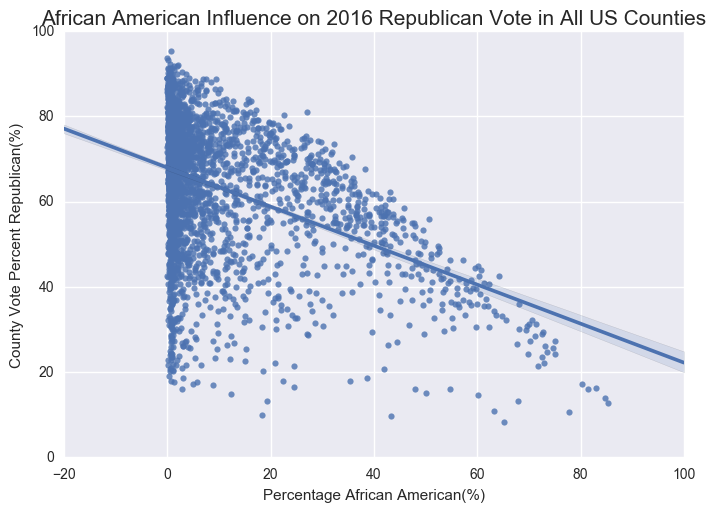

In [131]:
ax = sns.regplot(combined_5.af_am, combined_5.per_gop)
ax.set(xlabel = 'Percentage African American(%)', ylabel = 'County Vote Percent Republican(%)')
ax.set_title('African American Influence on 2016 Republican Vote in All US Counties', fontsize=15)
plt.show()

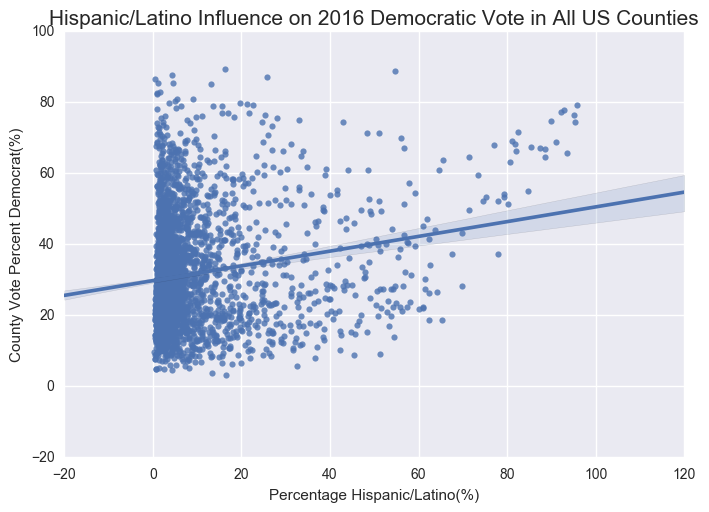

In [132]:
ax = sns.regplot(combined_5.hisp_lat_am, combined_5.per_dem)
ax.set(xlabel = 'Percentage Hispanic/Latino(%)', ylabel = 'County Vote Percent Democrat(%)')
ax.set_title('Hispanic/Latino Influence on 2016 Democratic Vote in All US Counties', fontsize=15)
plt.show()

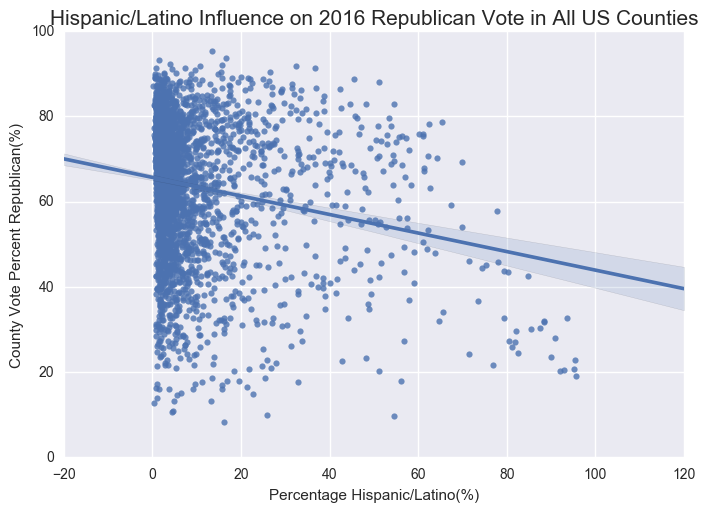

In [133]:
ax = sns.regplot(combined_5.hisp_lat_am, combined_5.per_gop)
ax.set(xlabel = 'Percentage Hispanic/Latino(%)', ylabel = 'County Vote Percent Republican(%)')
ax.set_title('Hispanic/Latino Influence on 2016 Republican Vote in All US Counties', fontsize=15)
plt.show()
# A correlation is there, but it's not that strong due to the sheer amount of 
# counties with little hispanic/latino population.

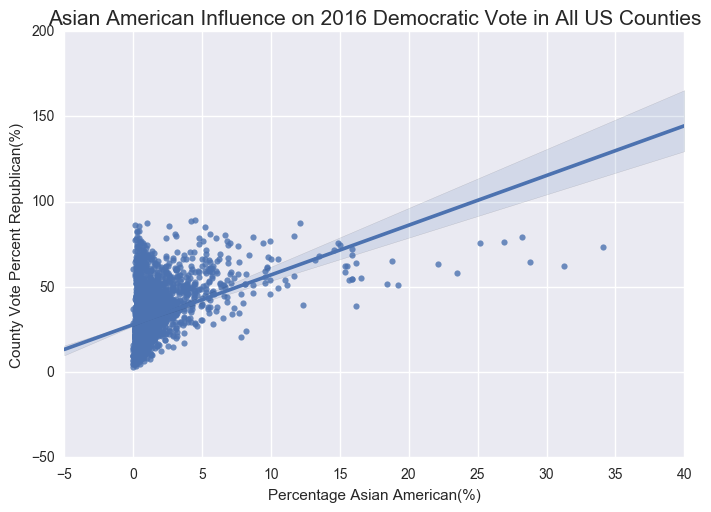

In [134]:
ax = sns.regplot(combined_5.asian_am, combined_5.per_dem)
ax.set(xlabel = 'Percentage Asian American(%)', ylabel = 'County Vote Percent Republican(%)')
ax.set_title('Asian American Influence on 2016 Democratic Vote in All US Counties', fontsize=15)
plt.show()

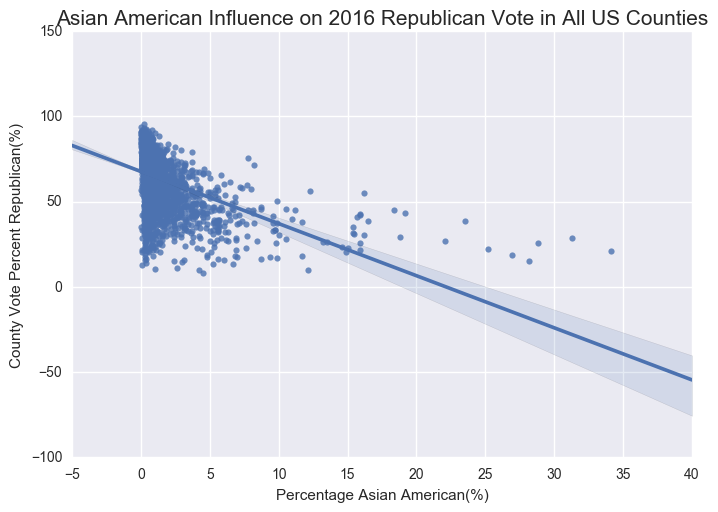

In [135]:
ax = sns.regplot(combined_5.asian_am, combined_5.per_gop)
ax.set(xlabel = 'Percentage Asian American(%)', ylabel = 'County Vote Percent Republican(%)')
ax.set_title('Asian American Influence on 2016 Republican Vote in All US Counties', fontsize=15)
plt.show()

## Swing States

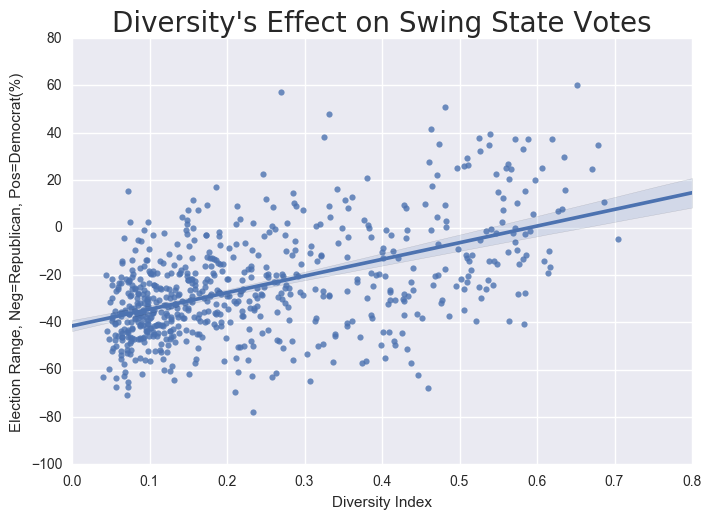

In [136]:
ax = sns.regplot(swing_states.div_index, swing_states.election_range)
ax.set(xlabel = 'Diversity Index', ylabel = 'Election Range, Neg=Republican, Pos=Democrat(%)')
ax.set_title("Diversity's Effect on Swing State Votes", fontsize=20, fontname='Ubuntu')
plt.show()

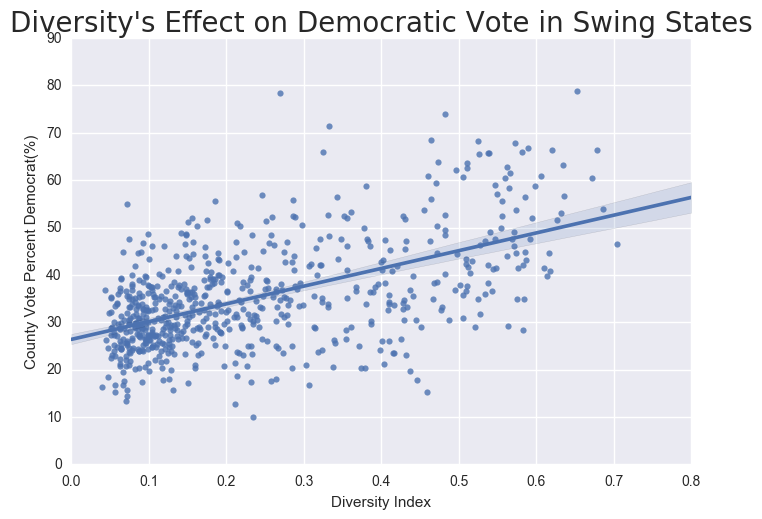

In [137]:
ax = sns.regplot(swing_states.div_index, swing_states.per_dem)
ax.set(xlabel = 'Diversity Index', ylabel = 'County Vote Percent Democrat(%)')
ax.set_title("Diversity's Effect on Democratic Vote in Swing States", fontsize=20, fontname='Ubuntu')
plt.show()

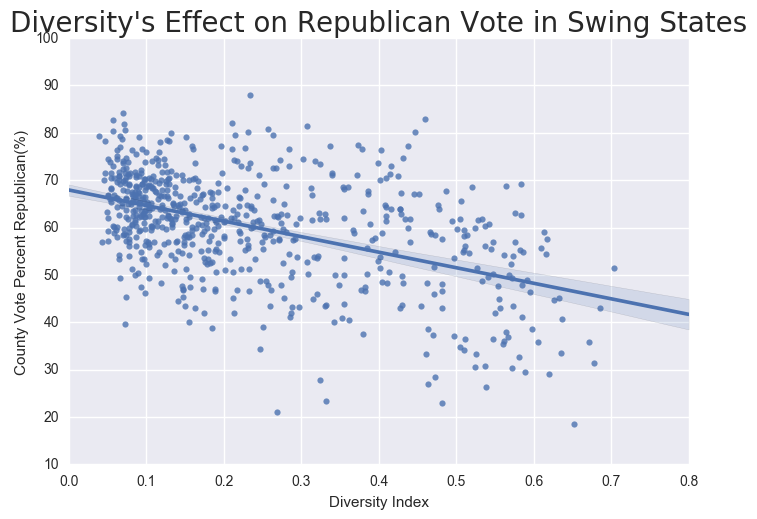

In [138]:
ax = sns.regplot(swing_states.div_index, swing_states.per_gop)
ax.set(xlabel = 'Diversity Index', ylabel = 'County Vote Percent Republican(%)')
ax.set_title("Diversity's Effect on Republican Vote in Swing States", fontsize=20, fontname='Ubuntu')
plt.show()

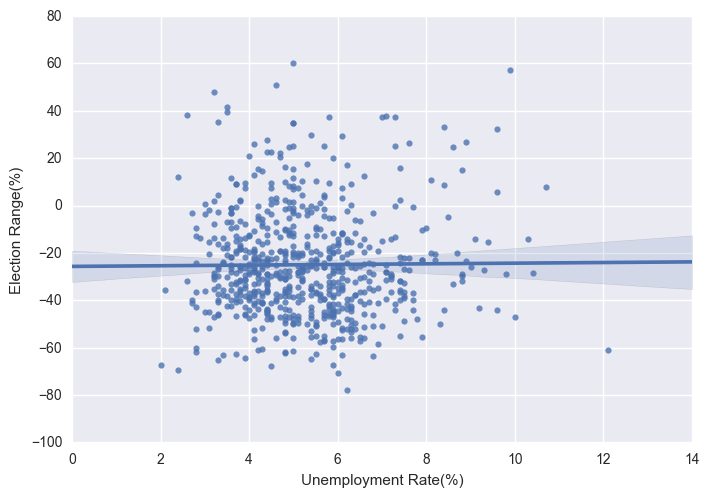

In [139]:
ax = sns.regplot(swing_states.ue_rate, swing_states.election_range)
ax.set(xlabel = 'Unemployment Rate(%)', ylabel = 'Election Range(%)')
plt.show()

In [140]:
# No discernable realtionship for unemployment in the swing states, just as in the overall dataset.

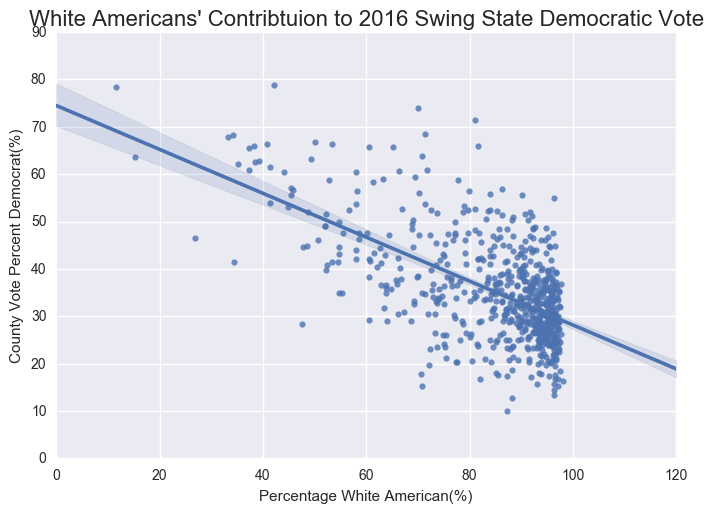

In [141]:
ax = sns.regplot(swing_states.white_am, swing_states.per_dem)
ax.set(xlabel = 'Percentage White American(%)', ylabel = 'County Vote Percent Democrat(%)')
ax.set_title("White Americans' Contribtuion to 2016 Swing State Democratic Vote", fontsize=16)
plt.show()

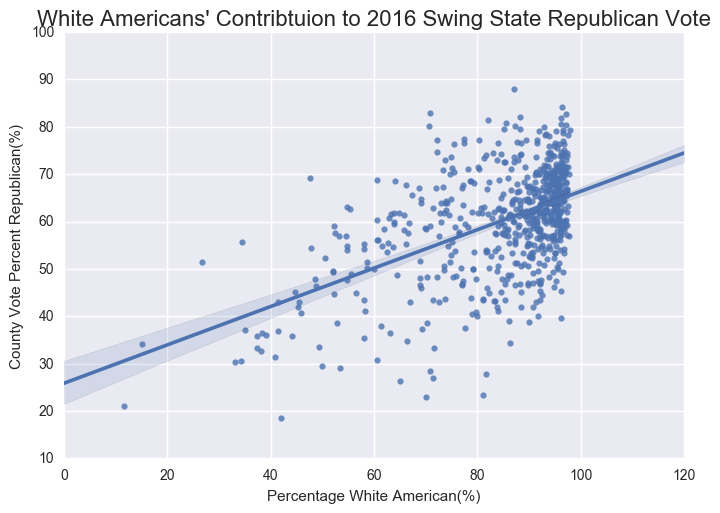

In [142]:
ax = sns.regplot(swing_states.white_am, swing_states.per_gop)
ax.set(xlabel = 'Percentage White American(%)', ylabel = 'County Vote Percent Republican(%)')
ax.set_title("White Americans' Contribtuion to 2016 Swing State Republican Vote", fontsize=16)
plt.show()

In [143]:
# Look for how incomes of white americans influence how they vote.

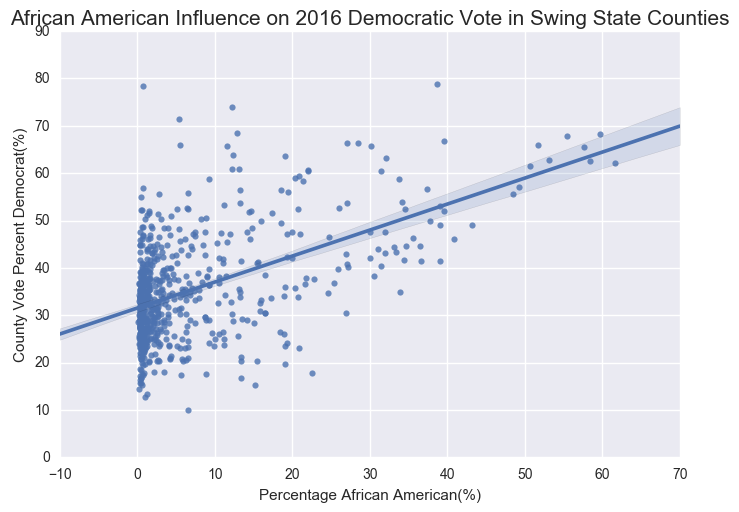

In [144]:
ax = sns.regplot(swing_states.af_am, swing_states.per_dem)
ax.set(xlabel = 'Percentage African American(%)', ylabel = 'County Vote Percent Democrat(%)')
ax.set_title('African American Influence on 2016 Democratic Vote in Swing State Counties', fontsize=15)
plt.show()

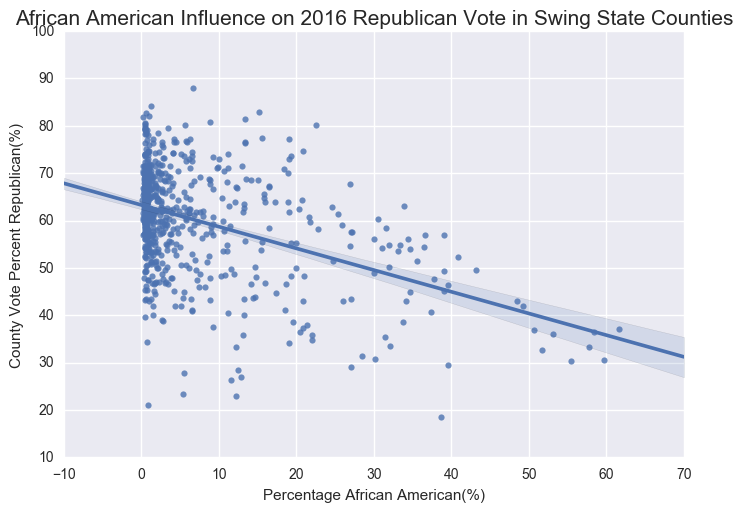

In [145]:
ax = sns.regplot(swing_states.af_am, swing_states.per_gop)
ax.set(xlabel = 'Percentage African American(%)', ylabel = 'County Vote Percent Republican(%)')
ax.set_title('African American Influence on 2016 Republican Vote in Swing State Counties', fontsize=15)
plt.show()

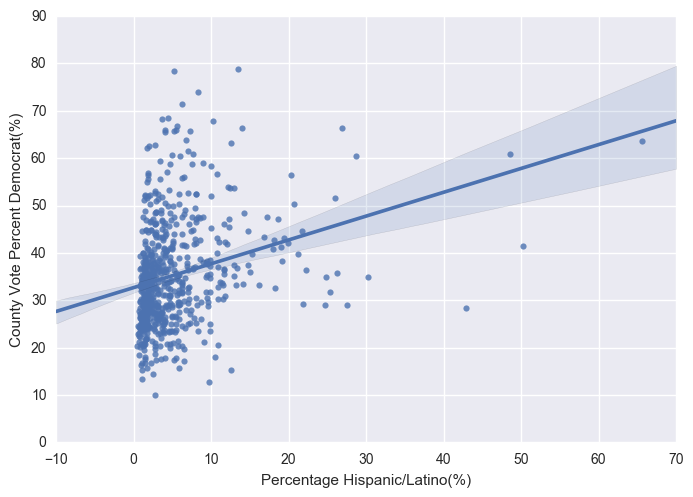

In [146]:
ax = sns.regplot(swing_states.hisp_lat_am, swing_states.per_dem)
ax.set(xlabel = 'Percentage Hispanic/Latino(%)', ylabel = 'County Vote Percent Democrat(%)')
plt.show()

In [147]:
# Again, a scattered, but string correlation.

In [148]:
# The change in the uninsured rate does not appear to have benefitted Democrats, 
# but does appear to have benefitted Republicans. 

# Influence of Education 

In [149]:
edu.columns

Index([                           u'FIPS Code',
                                      u'State',
                                  u'Area name',
                       u'less_hs_diploma_2000',
                       u'hs_diploma_only_2000',
                          u'less_4_years_2000',
                       u'four_or_ higher_2000',
          u'per_less_high_school diploma_2000',
                   u'per_hs_diploma_only_2000',
                      u'per_less_4_years_2000',
                   u'per_four_or_ higher_2000',
           u'less_high_school_diploma_2011_15',
                    u'hs_diploma_only_2011_15',
                       u'less_4_years_2011_15',
                    u'four_or_ higher_2011_15',
       u'per_less_high_school_diploma_2011_15',
                u'per_hs_diploma_only_2011_15',
                   u'per_less_4_years_2011_15',
                 u'per_four_or_higher_2011_15',
                               u'county_state'],
      dtype='object')

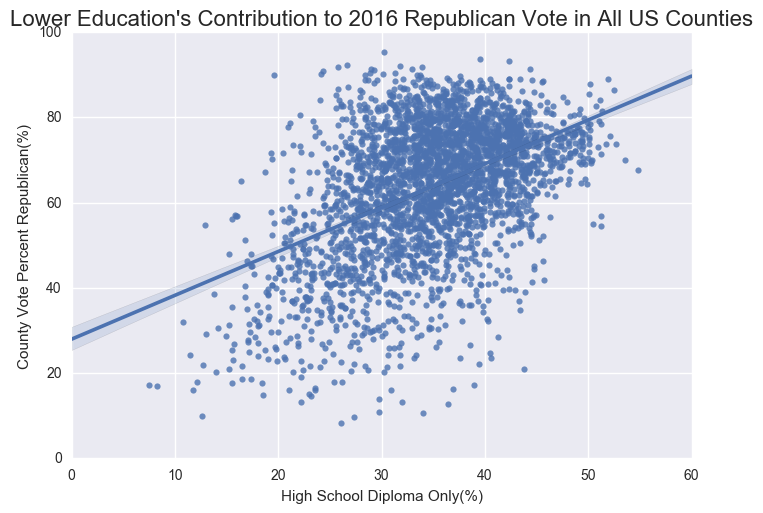

In [150]:
ax = sns.regplot(combined_5.per_hs_diploma_only_2011_15, combined_5.per_gop)
ax.set(xlabel = 'High School Diploma Only(%)', ylabel = 'County Vote Percent Republican(%)')
ax.set_title("Lower Education's Contribution to 2016 Republican Vote in All US Counties", fontsize=16)
plt.show()

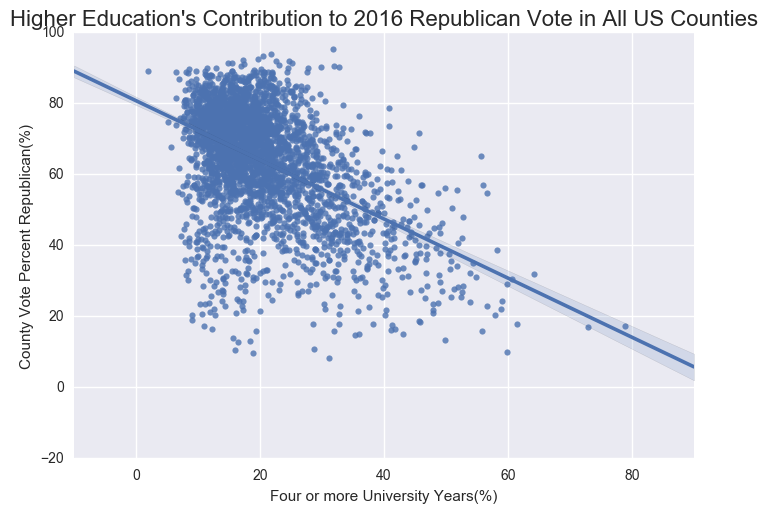

In [151]:
ax = sns.regplot(combined_5.per_four_or_higher_2011_15, combined_5.per_gop)
ax.set(xlabel = 'Four or more University Years(%)', ylabel = 'County Vote Percent Republican(%)')
ax.set_title("Higher Education's Contribution to 2016 Republican Vote in All US Counties", fontsize=16)
plt.show()

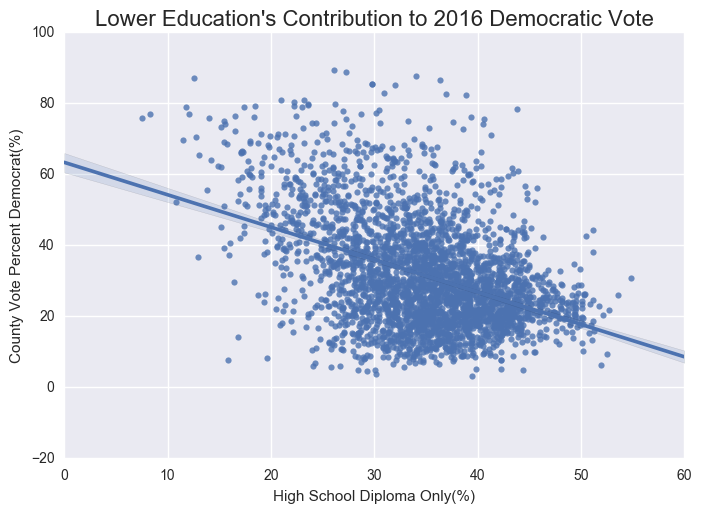

In [152]:
ax = sns.regplot(combined_5.per_hs_diploma_only_2011_15, combined_5.per_dem)
ax.set(xlabel = 'High School Diploma Only(%)', ylabel = 'County Vote Percent Democrat(%)')
ax.set_title("Lower Education's Contribution to 2016 Democratic Vote", fontsize=16)
plt.show()

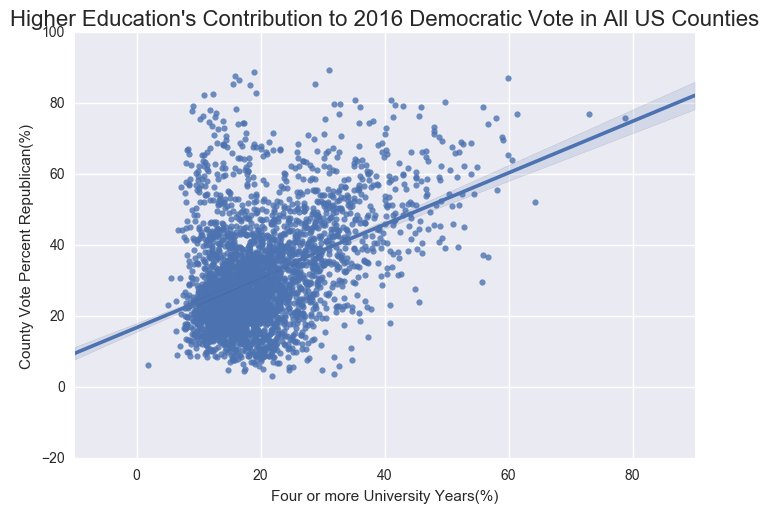

In [153]:
ax = sns.regplot(combined_5.per_four_or_higher_2011_15, combined_5.per_dem)
ax.set(xlabel = 'Four or more University Years(%)', ylabel = 'County Vote Percent Republican(%)')
ax.set_title("Higher Education's Contribution to 2016 Democratic Vote in All US Counties", fontsize=16)
plt.show()

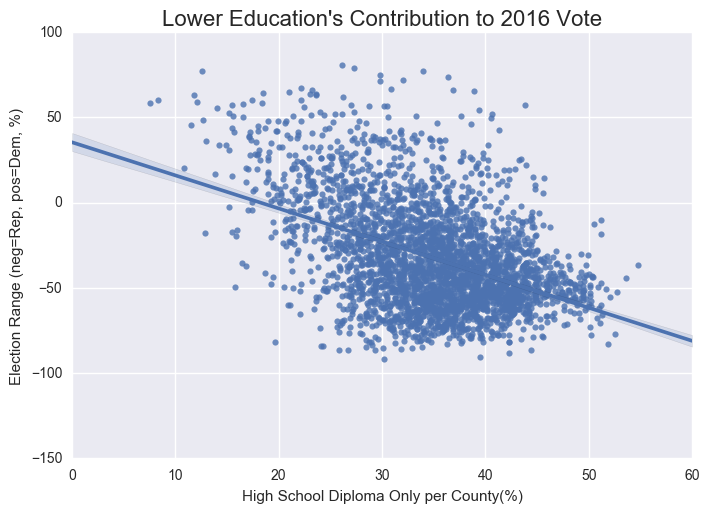

In [154]:
ax = sns.regplot(combined_5.per_hs_diploma_only_2011_15, combined_5.election_range)
ax.set(xlabel = 'High School Diploma Only per County(%)', ylabel = 'Election Range (neg=Rep, pos=Dem, %)')
ax.set_title("Lower Education's Contribution to 2016 Vote", fontsize=16)
plt.show()

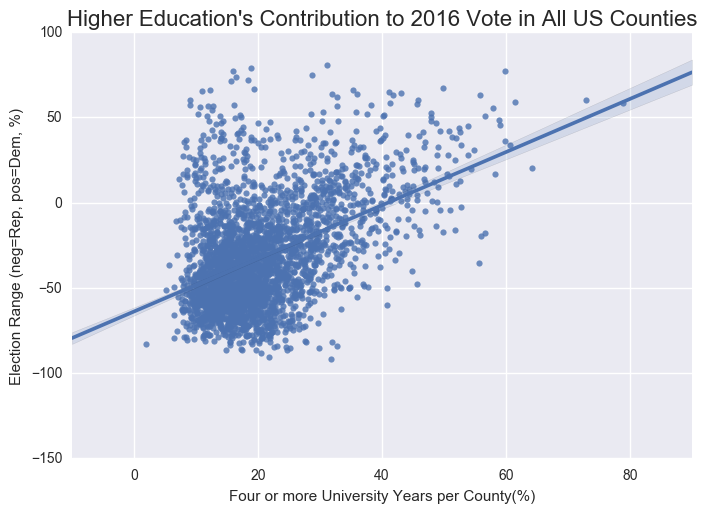

In [155]:
ax = sns.regplot(combined_5.per_four_or_higher_2011_15, combined_5.election_range)
ax.set(xlabel = 'Four or more University Years per County(%)', ylabel = 'Election Range (neg=Rep, pos=Dem, %)')
ax.set_title("Higher Education's Contribution to 2016 Vote in All US Counties", fontsize=16)
plt.show()

## Swing States

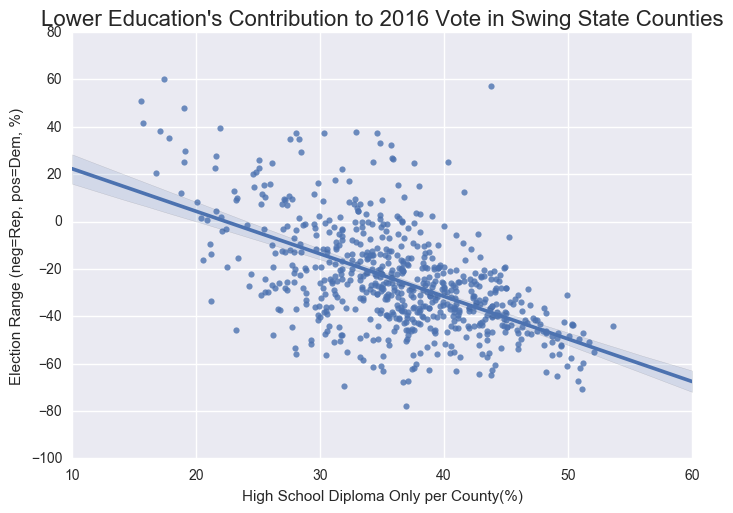

In [156]:
ax = sns.regplot(swing_states.per_hs_diploma_only_2011_15, swing_states.election_range)
ax.set(xlabel = 'High School Diploma Only per County(%)', ylabel = 'Election Range (neg=Rep, pos=Dem, %)')
ax.set_title("Lower Education's Contribution to 2016 Vote in Swing State Counties", fontsize=16)
plt.show()

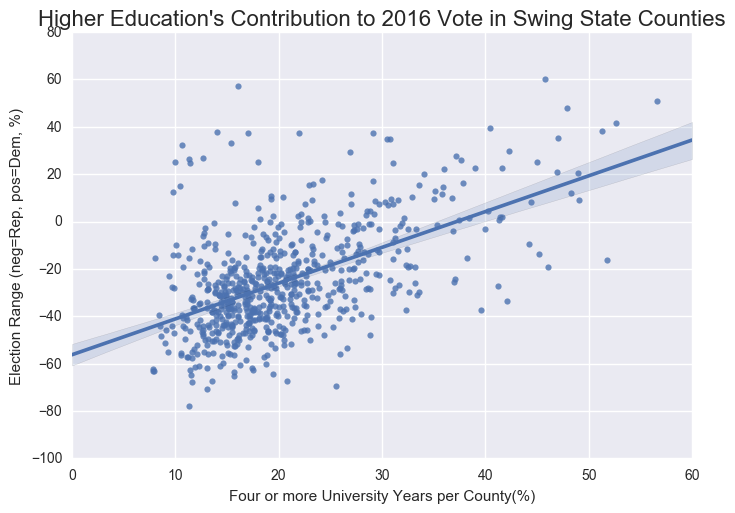

In [157]:
ax = sns.regplot(swing_states.per_four_or_higher_2011_15, swing_states.election_range)
ax.set(xlabel = 'Four or more University Years per County(%)', ylabel = 'Election Range (neg=Rep, pos=Dem, %)')
ax.set_title("Higher Education's Contribution to 2016 Vote in Swing State Counties", fontsize=16)
plt.show()

In [158]:
# If a county has a higher percentage of people with only a hs diploma, then more likely
# to vote Republican. If a county has a higher proportion of 4+ college degrees, then 
# more likely to go Democrat. Pretty much aligns with Nat Silver's argument. 

In [159]:
combined_5.labor_force.head()

0     10423.0
1     26186.0
2     15972.0
3    217281.0
4      4266.0
Name: labor_force, dtype: float64

## Labor Force

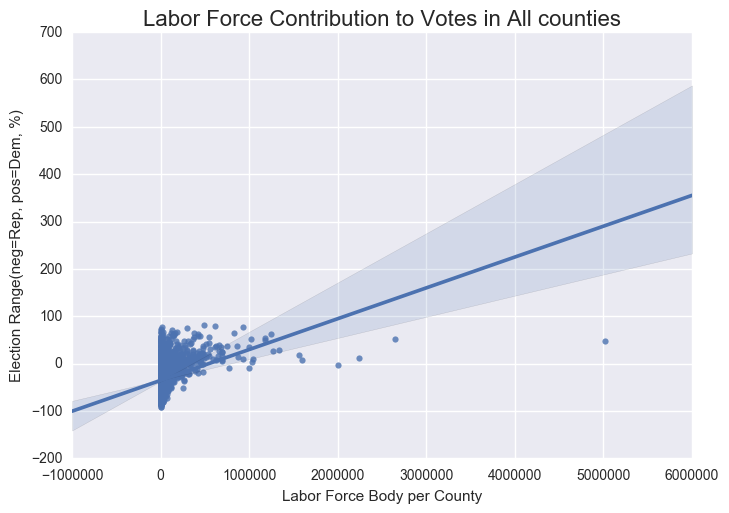

In [160]:
ax = sns.regplot(combined_5.labor_force, combined_5.election_range)
ax.set(xlabel = 'Labor Force Body per County', ylabel = 'Election Range(neg=Rep, pos=Dem, %)')
ax.set_title("Labor Force Contribution to Votes in All counties", fontsize=16)
plt.show()

## Population 

In [161]:
combined_5.head(1)

county_state state            county  est_pop_2015  \
0  Abbeville County, SC    SC  Abbeville County         24932   

   pop_change_2015  int_mig_2015  dom_mig_2015  mig_2015  FIPS Code State  \
0                6            22           -12        10    45001.0    SC   

      ...     per_point_diff  state_abbr     county_name_r  election_range  \
0     ...              28.25          SC  Abbeville County      -28.254383   

   slight_dem  slight_gop  med_dem  med_gop  strong_dem  strong_gop  
0       False       False    False    False       False        True  

[1 rows x 61 columns]

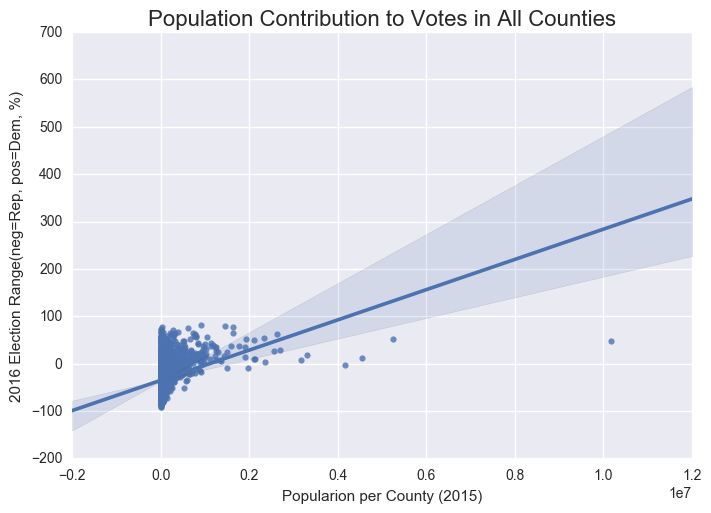

In [162]:
ax = sns.regplot(combined_5.est_pop_2015, combined_5.election_range)
ax.set(xlabel = 'Popularion per County (2015)', ylabel = '2016 Election Range(neg=Rep, pos=Dem, %)')
ax.set_title("Population Contribution to Votes in All Counties", fontsize=16)
plt.show()

In [163]:
# Population size per county does correlate with vote.

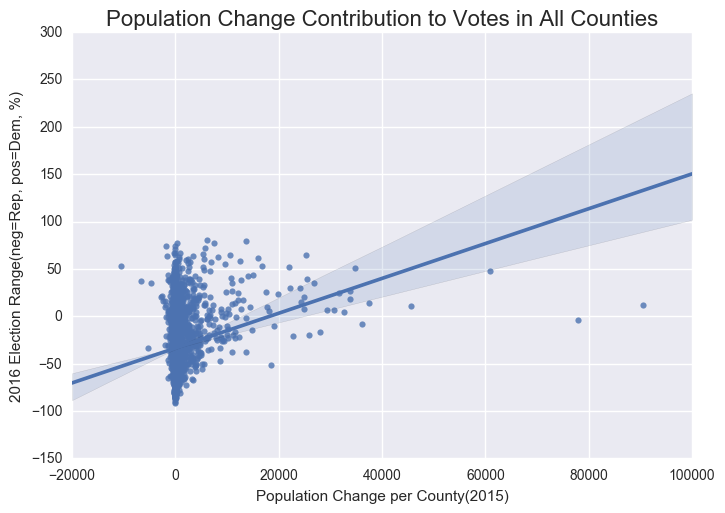

In [164]:
ax = sns.regplot(combined_5.pop_change_2015, combined_5.election_range)                                                                                              
ax.set(xlabel = 'Population Change per County(2015)', ylabel = '2016 Election Range(neg=Rep, pos=Dem, %)')
ax.set_title("Population Change Contribution to Votes in All Counties", fontsize=16)
plt.show()

In [166]:
# Counties that experienced a positve change in population saw a boost for Dems.

In [167]:
# Although there is that cluster towards zero, and the correlation is broad, there
# is still something there.

# Modeling

## Regression

Most predictive features for counties' vote found through EDA:

(note that these variables, sometimes by their nature, don't necessarily follow a normal distribution)

Percentage White American population

Percentage African American population 

Percentage Asian American population

Percentage High School Diploma only

Percentage Four or more years of University

In [169]:
modeling = combined_5.drop(combined_5[[0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,34,35,36,37,38,39,40,52,53]], axis=1)

In [170]:
modeling.head()

est_pop_2015  pop_change_2015  per_hs_diploma_only_2011_15  \
0         24932                6                         37.5   
1         62577               79                         39.2   
2         32973              -25                         39.9   
3        434211             7364                         21.4   
4          7228             -189                         44.7   

   per_four_or_higher_2011_15  div_index  af_am  native_2013  asian_am  \
0                        12.3   0.445417   28.2          0.3       0.4   
1                        10.5   0.355956   18.3          0.3       0.4   
2                        18.8   0.539878   28.0          0.6       0.6   
3                        37.1   0.256622    1.3          0.8       2.6   
4                        15.3   0.054921    0.2          0.1       0.4   

   pac_am  two_or_more_races     ...        per_gop    diff  per_point_diff  \
0     0.0                1.3     ...      62.868333   3,030           28.25   
1     0.0                1.3     ...      77.262105  15,521           56.67   
2     0.2                1.5     ...      54.471596   1,845           11.71   
3     0.2                2.6     ...      47.931611  18,072            9.24   
4     0.0                0.7     ...      65.336526   1,329           35.36   

   election_range  slight_dem  slight_gop  med_dem  med_gop  strong_dem  \
0      -28.254383       False       False    False    False       False   
1      -56.674943       False       False    False    False       False   
2      -11.710568       False       False    False     True       False   
3       -9.239878       False        True    False    False       False   
4      -35.355148       False       False    False    False       False   

   strong_gop  
0        True  
1       False  
2       False  
3       False  
4        True  

[5 rows x 29 columns]

In [172]:
modeling.dropna(inplace=True)
#Only 46 isn't too significant.

In [173]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix, mean_squared_error

In [174]:
lr = LinearRegression()

In [175]:
modeling.columns

Index([               u'est_pop_2015',             u'pop_change_2015',
       u'per_hs_diploma_only_2011_15',  u'per_four_or_higher_2011_15',
                         u'div_index',                       u'af_am',
                       u'native_2013',                    u'asian_am',
                            u'pac_am',           u'two_or_more_races',
                       u'hisp_lat_am',                 u'labor_force',
                          u'employed',                  u'unemployed',
                           u'ue_rate',                   u'votes_dem',
                         u'votes_gop',                 u'total_votes',
                           u'per_dem',                     u'per_gop',
                              u'diff',              u'per_point_diff',
                    u'election_range',                  u'slight_dem',
                        u'slight_gop',                     u'med_dem',
                           u'med_gop',                  u'strong_dem',
      

In [176]:
X = modeling[[0,1,2,3,4,5,6,7,8,9,10,11]] 
y = modeling['election_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [177]:
X.head(0)

Empty DataFrame
Columns: [est_pop_2015, pop_change_2015, per_hs_diploma_only_2011_15, per_four_or_higher_2011_15, div_index, af_am, native_2013, asian_am, pac_am, two_or_more_races, hisp_lat_am, labor_force]
Index: []

In [178]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

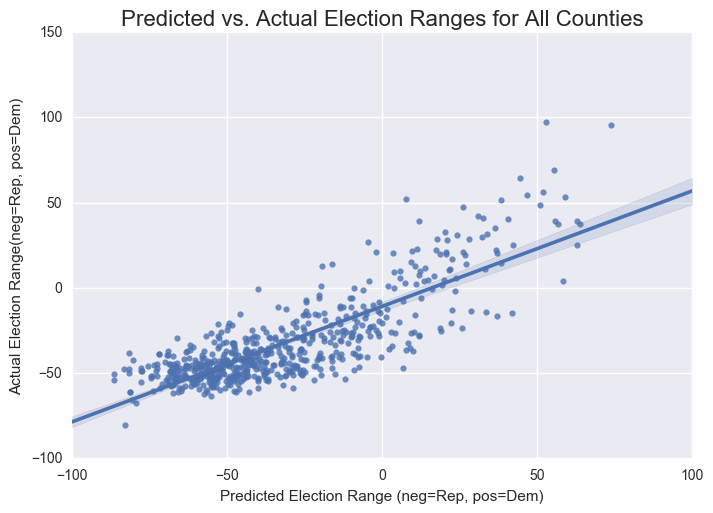

In [179]:
ax = sns.regplot(y_test, y_pred)
ax.set(xlabel = 'Predicted Election Range (neg=Rep, pos=Dem)', ylabel = 'Actual Election Range(neg=Rep, pos=Dem)')
ax.set_title("Predicted vs. Actual Election Ranges for All Counties", fontsize=16)
plt.show()

In [180]:
lr.score(X_train, y_train)

0.66806575723520978

## Model Swing States 

In [181]:
s_modeling = swing_states.drop(swing_states[[0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,34,35,36,37,38,39,40,52,53]], axis=1)

In [182]:
swing_states.head(0)

Empty DataFrame
Columns: [county_state, state, county, est_pop_2015, pop_change_2015, int_mig_2015, dom_mig_2015, mig_2015, FIPS Code, State, Area name, less_hs_diploma_2000, hs_diploma_only_2000, less_4_years_2000, four_or_ higher_2000, per_less_high_school diploma_2000, per_hs_diploma_only_2000, per_less_4_years_2000, per_four_or_ higher_2000, less_high_school_diploma_2011_15, hs_diploma_only_2011_15, less_4_years_2011_15, four_or_ higher_2011_15, per_less_high_school_diploma_2011_15, per_hs_diploma_only_2011_15, per_less_4_years_2011_15, per_four_or_higher_2011_15, div_index, af_am, native_2013, asian_am, pac_am, two_or_more_races, hisp_lat_am, white_am, county_fips, county_name, state_abbrev, 2013 uninsured rate, 2016 uninsured rate, decrease from 2013 to 2016, labor_force, employed, unemployed, ue_rate, votes_dem, votes_gop, total_votes, per_dem, per_gop, diff, per_point_diff, state_abbr, county_name_r, election_range, slight_dem, slight_gop, med_dem, med_gop, strong_dem, strong_gop]
Index: []

[0 rows x 61 columns]

In [183]:
s_modeling.head(0)

Empty DataFrame
Columns: [est_pop_2015, pop_change_2015, per_hs_diploma_only_2011_15, per_four_or_higher_2011_15, div_index, af_am, native_2013, asian_am, pac_am, two_or_more_races, hisp_lat_am, labor_force, employed, unemployed, ue_rate, votes_dem, votes_gop, total_votes, per_dem, per_gop, diff, per_point_diff, election_range, slight_dem, slight_gop, med_dem, med_gop, strong_dem, strong_gop]
Index: []

[0 rows x 29 columns]

In [184]:
X = s_modeling[[0,1,2,3,4,5,6,7,8,9,10,11]] 
y = s_modeling['election_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [185]:
X.head()

est_pop_2015  pop_change_2015  per_hs_diploma_only_2011_15  \
4            7228             -189                         44.7   
9            3796              -75                         39.1   
40          13886             -175                         42.1   
75          12529              -99                         36.3   
106          5773              -20                         42.3   

     per_four_or_higher_2011_15  div_index  af_am  native_2013  asian_am  \
4                          15.3   0.054921    0.2          0.1       0.4   
9                          15.1   0.058873    0.3          0.5       0.6   
40                         16.3   0.159016    1.5          0.6       0.5   
75                         17.6   0.074125    0.6          0.3       0.3   
106                        14.3   0.049200    0.4          0.2       0.5   

     pac_am  two_or_more_races  hisp_lat_am  labor_force  
4       0.0                0.7          1.5       4266.0  
9       0.0                0.6          1.1       2300.0  
40      0.3                1.0          5.8       7727.0  
75      0.0                1.1          1.6       6255.0  
106     0.0                0.7          0.9       3251.0

In [186]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

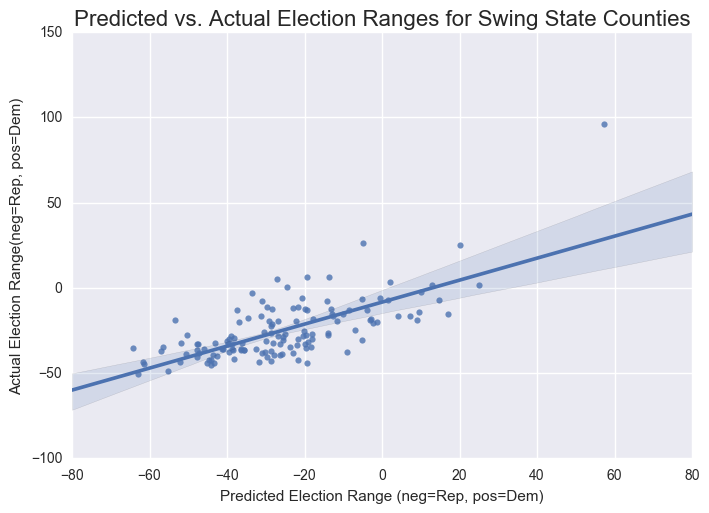

In [187]:
ax = sns.regplot(y_test, y_pred)
ax.set(xlabel = 'Predicted Election Range (neg=Rep, pos=Dem)', ylabel = 'Actual Election Range(neg=Rep, pos=Dem)')
ax.set_title("Predicted vs. Actual Election Ranges for Swing State Counties", fontsize=16)
plt.show()

In [188]:
lr.score(X_train, y_train)
# Right around the same R^2 score as all counties.

0.66209473643341399

## Classification

Now we want to see what features classify a county into being "slight dem", "slight gop, "med_dem", "med_gop", "strong_dem", and "strong_gop."

In [189]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, roc_curve, auc

In [190]:
# Setting the number of neighbors to the square root of number of instances is a good 
# rule of thumb.
knn = KNeighborsClassifier(n_neighbors = 55)
rfc = RandomForestClassifier(max_depth = 5) 

In [193]:
dummies = pd.get_dummies(modeling[['slight_dem','slight_gop','med_dem','med_gop','strong_dem','strong_gop']])
c_modeling = modeling.join(dummies)
c_modeling = c_modeling.reset_index()
c_modeling = c_modeling.drop(c_modeling[[0]], axis=1)

In [195]:
c_modeling.columns

Index([               u'est_pop_2015',             u'pop_change_2015',
       u'per_hs_diploma_only_2011_15',  u'per_four_or_higher_2011_15',
                         u'div_index',                       u'af_am',
                       u'native_2013',                    u'asian_am',
                            u'pac_am',           u'two_or_more_races',
                       u'hisp_lat_am',                 u'labor_force',
                          u'employed',                  u'unemployed',
                           u'ue_rate',                   u'votes_dem',
                         u'votes_gop',                 u'total_votes',
                           u'per_dem',                     u'per_gop',
                              u'diff',              u'per_point_diff',
                    u'election_range',                  u'slight_dem',
                        u'slight_gop',                     u'med_dem',
                           u'med_gop',                  u'strong_dem',
      

In [196]:
# Swing State Classifiers
dummies = pd.get_dummies(s_modeling[['slight_dem','slight_gop','med_dem','med_gop','strong_dem','strong_gop']])
cs_modeling = s_modeling.join(dummies)
cs_modeling = cs_modeling.reset_index()
cs_modeling = cs_modeling.drop(c_modeling[[0]], axis=1)

## First test for slight dem and slight gop.

In [197]:
# First try KNN for just slight dem and slight gop.
X = c_modeling[[0,1,2,3,4,5,6,7,8,9,10,11]]
y = c_modeling[[29,30,31,32]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [198]:
X.head()

est_pop_2015  pop_change_2015  per_hs_diploma_only_2011_15  \
0         24932                6                         37.5   
1         62577               79                         39.2   
2         32973              -25                         39.9   
3        434211             7364                         21.4   
4          7228             -189                         44.7   

   per_four_or_higher_2011_15  div_index  af_am  native_2013  asian_am  \
0                        12.3   0.445417   28.2          0.3       0.4   
1                        10.5   0.355956   18.3          0.3       0.4   
2                        18.8   0.539878   28.0          0.6       0.6   
3                        37.1   0.256622    1.3          0.8       2.6   
4                        15.3   0.054921    0.2          0.1       0.4   

   pac_am  two_or_more_races  hisp_lat_am  labor_force  
0     0.0                1.3          1.2      10423.0  
1     0.0                1.3          2.0      26186.0  
2     0.2                1.5          9.0      15972.0  
3     0.2                2.6          7.5     217281.0  
4     0.0                0.7          1.5       4266.0

In [199]:
y.head()

slight_dem_False  slight_dem_True  slight_gop_False  slight_gop_True
0               1.0              0.0               1.0              0.0
1               1.0              0.0               1.0              0.0
2               1.0              0.0               1.0              0.0
3               1.0              0.0               0.0              1.0
4               1.0              0.0               1.0              0.0

In [200]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=55, p=2,
           weights='uniform')

In [201]:
y_pred = knn.predict(X_test)

In [202]:
print knn.score(X_train,y_train)
print accuracy_score(y_test, y_pred)
print cross_val_score(knn, X_train, y_train, cv=5)
print(classification_report(y_test,y_pred)) 

0.892871526379
0.901771336554
[ 0.90342052  0.90140845  0.8832998   0.875       0.90120968]
             precision    recall  f1-score   support

          0       0.95      1.00      0.98       591
          1       0.00      0.00      0.00        30
          2       0.95      1.00      0.97       590
          3       0.00      0.00      0.00        31

avg / total       0.90      0.95      0.93      1242



/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Now test for medium gop and medium dem.

In [203]:
#KNN for med_dem and med_gop
X = c_modeling[[0,1,2,3,4,5,6,7,8,9,10,11]]
y = c_modeling[[33,34,35,36]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_pred = knn.predict(X_test)

In [204]:
print knn.score(X_train,y_train)
print accuracy_score(y_test, y_pred)
print cross_val_score(knn, X_train, y_train, cv=5)
print(classification_report(y_test,y_pred))

0.826016915022
0.811594202899
[ 0.82293763  0.81891348  0.81488934  0.83870968  0.83467742]
             precision    recall  f1-score   support

          0       0.95      1.00      0.97       589
          1       0.00      0.00      0.00        32
          2       0.86      1.00      0.93       536
          3       0.00      0.00      0.00        85

avg / total       0.82      0.91      0.86      1242



## Now test for strong gop and strong dem.

In [205]:
#KNN for strong dem and stronggop
X = c_modeling[[0,1,2,3,4,5,6,7,8,9,10,11]]
y = c_modeling[[37,38,39,40]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_pred = knn.predict(X_test)

In [206]:
print knn.score(X_train,y_train)
print accuracy_score(y_test, y_pred)
print cross_val_score(knn, X_train, y_train, cv=5)
print(classification_report(y_test,y_pred))

0.627064035441
0.631239935588
[ 0.56740443  0.64788732  0.64788732  0.64717742  0.60685484]
             precision    recall  f1-score   support

          0       0.95      1.00      0.98       593
          1       0.00      0.00      0.00        28
          2       0.68      1.00      0.81       420
          3       0.00      0.00      0.00       201

avg / total       0.68      0.82      0.74      1242



## Swing States Classifiers

In [207]:
#First slight dem and slight gop
X = cs_modeling[[0,1,2,3,4,5,6,7,8,9,10,11]]
y = cs_modeling[[29,30,31,32]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=55, p=2,
           weights='uniform')

In [208]:
y_pred = knn.predict(X_test)

In [209]:
print knn.score(X_train,y_train)
print accuracy_score(y_test, y_pred)
print cross_val_score(knn, X_train, y_train, cv=5)
print(classification_report(y_test,y_pred))

0.856332703214
0.87969924812
[ 0.85849057  0.87735849  0.83962264  0.86792453  0.83809524]
             precision    recall  f1-score   support

          0       0.93      1.00      0.96       124
          1       0.00      0.00      0.00         9
          2       0.95      1.00      0.97       126
          3       0.00      0.00      0.00         7

avg / total       0.88      0.94      0.91       266



## Medium Dem and GOP 

In [210]:
#KNN for med_dem and med_gop
X = cs_modeling[[0,1,2,3,4,5,6,7,8,9,10,11]]
y = cs_modeling[[33,34,35,36]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_pred = knn.predict(X_test)

In [211]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=55, p=2,
           weights='uniform')

In [212]:
print knn.score(X_train,y_train)
print accuracy_score(y_test, y_pred)
print cross_val_score(knn, X_train, y_train, cv=5)
print(classification_report(y_test,y_pred))

0.744801512287
0.781954887218
[ 0.80188679  0.69811321  0.74528302  0.73584906  0.74285714]
             precision    recall  f1-score   support

          0       0.98      1.00      0.99       130
          1       0.00      0.00      0.00         3
          2       0.80      1.00      0.89       107
          3       0.00      0.00      0.00        26

avg / total       0.80      0.89      0.84       266



## Strong Dem and GOP

In [213]:
X = cs_modeling[[0,1,2,3,4,5,6,7,8,9,10,11]]
y = cs_modeling[[37,38,39,40]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_pred = knn.predict(X_test)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=55, p=2,
           weights='uniform')

In [214]:
print knn.score(X_train,y_train)
print accuracy_score(y_test, y_pred)
print cross_val_score(knn, X_train, y_train, cv=5)
print(classification_report(y_test,y_pred))

0.576559546314
0.428571428571
[ 0.47169811  0.59433962  0.5754717   0.56603774  0.59047619]
             precision    recall  f1-score   support

          0       0.93      1.00      0.96       124
          1       0.00      0.00      0.00         9
          2       0.50      1.00      0.66        66
          3       0.00      0.00      0.00        67

avg / total       0.56      0.71      0.61       266



Modeling for the "strong" counties of 25-50% is not that predictive. 

In [215]:
## Random Forests

# RFC for slight dem and slight gop

In [216]:
X = c_modeling[[0,1,2,3,4,5,6,7,8,9,10,11]]
y = c_modeling[[29,30,31,32]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [217]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [218]:
y_pred = rfc.predict(X_test)

In [219]:
print knn.score(X_train,y_train)
print accuracy_score(y_test, y_pred)
print cross_val_score(knn, X_train, y_train, cv=5)
print(classification_report(y_test,y_pred))

0.327829238824
0.900161030596
[ 0.90342052  0.90140845  0.8832998   0.875       0.90120968]
             precision    recall  f1-score   support

          0       0.95      1.00      0.97       591
          1       0.00      0.00      0.00        30
          2       0.95      1.00      0.97       590
          3       0.00      0.00      0.00        31

avg / total       0.90      0.95      0.93      1242



# RFC for medium dem and medium gop

In [220]:
X = c_modeling[[0,1,2,3,4,5,6,7,8,9,10,11]]
y = c_modeling[[33,34,35,36]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [221]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [222]:
y_pred = rfc.predict(X_test)

In [223]:
print knn.score(X_train,y_train)
print accuracy_score(y_test, y_pred)
print cross_val_score(knn, X_train, y_train, cv=5)
print(classification_report(y_test,y_pred))

0.335884011277
0.811594202899
[ 0.82293763  0.81891348  0.81488934  0.83870968  0.83467742]
             precision    recall  f1-score   support

          0       0.95      1.00      0.97       589
          1       0.00      0.00      0.00        32
          2       0.86      1.00      0.93       536
          3       0.00      0.00      0.00        85

avg / total       0.82      0.91      0.86      1242



# RFC for strong dem and strong gop

In [224]:
X = c_modeling[[0,1,2,3,4,5,6,7,8,9,10,11]]
y = c_modeling[[37,38,39,40]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [225]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [226]:
y_pred = rfc.predict(X_test)

In [227]:
print knn.score(X_train,y_train)
print accuracy_score(y_test, y_pred)
print cross_val_score(knn, X_train, y_train, cv=5)
print(classification_report(y_test,y_pred))

0.418445428917
0.626409017713
[ 0.56740443  0.64788732  0.64788732  0.64717742  0.60685484]
             precision    recall  f1-score   support

          0       0.95      1.00      0.98       593
          1       0.00      0.00      0.00        28
          2       0.68      0.99      0.80       420
          3       0.33      0.01      0.02       201

avg / total       0.74      0.81      0.74      1242



In [228]:
# Just like in KNN, not the best classifier for "strong counties." 